Food Price Index Prediction

In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('wholesale_price_indices.csv')
df

,Date,wholesale_Price_Index,Arhar,Bajra,soyabean,wheat,sugarcane,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56
0,1990-01,64.1,73.4,53.5,64.1,44.59,87.9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-02,64.5,76.0,52.2,62.2,44.50,90.7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-03,63.8,77.8,41.4,61.3,45.75,95.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-04,65.8,80.4,48.4,62.8,44.02,94.3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-05,64.4,81.0,39.2,62.0,45.50,90.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,2022-11,134.7,114.6,137.4,150.1,154.70,114.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395,2022-12,131.8,112.4,138.2,147.3,144.60,117.2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396,2023-01,130.3,111.1,135.0,147.5,140.40,116.8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397,2023-02,129.7,112.1,131.3,146.7,135.90,125.2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 57 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   399 non-null    object 
 1   wholesale_Price_Index  399 non-null    float64
 2   Arhar                  399 non-null    float64
 3   Bajra                  399 non-null    float64
 4   soyabean               399 non-null    float64
 5   wheat                  399 non-null    float64
 6   sugarcane              399 non-null    float64
 7   Unnamed: 7             0 non-null      float64
 8   Unnamed: 8             0 non-null      float64
 9   Unnamed: 9             0 non-null      float64
 10  Unnamed: 10            0 non-null      float64
 11  Unnamed: 11            0 non-null      float64
 12  Unnamed: 12            0 non-null      float64
 13  Unnamed: 13            0 non-null      float64
 14  Unnamed: 14            0 non-null      float64
 15  Unname

In [7]:
df.isnull().sum()

Date                       0
wholesale_Price_Index      0
Arhar                      0
Bajra                      0
soyabean                   0
wheat                      0
sugarcane                  0
Unnamed: 7               399
Unnamed: 8               399
Unnamed: 9               399
Unnamed: 10              399
Unnamed: 11              399
Unnamed: 12              399
Unnamed: 13              399
Unnamed: 14              399
Unnamed: 15              399
Unnamed: 16              399
Unnamed: 17              399
Unnamed: 18              399
Unnamed: 19              399
Unnamed: 20              399
Unnamed: 21              399
Unnamed: 22              399
Unnamed: 23              399
Unnamed: 24              399
Unnamed: 25              399
Unnamed: 26              399
Unnamed: 27              398
Unnamed: 28              399
Unnamed: 29              399
Unnamed: 30              399
Unnamed: 31              399
Unnamed: 32              399
Unnamed: 33              399
Unnamed: 34   

As we can see that there are a lot of unnamed coloumns which are filled with null values which do not effect the target value. Hence we are not obligated to remove them or drop them.

In [8]:
# Dropping unnamed coloumns
df.drop(df.iloc[:, 7:66], inplace=True, axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   399 non-null    object 
 1   wholesale_Price_Index  399 non-null    float64
 2   Arhar                  399 non-null    float64
 3   Bajra                  399 non-null    float64
 4   soyabean               399 non-null    float64
 5   wheat                  399 non-null    float64
 6   sugarcane              399 non-null    float64
dtypes: float64(6), object(1)
memory usage: 21.9+ KB


In [10]:
df.shape

(399, 7)

In [11]:
df.describe()

,wholesale_Price_Index,Arhar,Bajra,soyabean,wheat,sugarcane
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,86.048371,84.442105,84.744612,87.530576,89.676541,81.584461
std,26.360465,17.222946,33.189158,31.914874,38.574228,31.278019
min,50.500000,51.100000,36.800000,48.600000,35.830000,31.800000
25%,64.000000,70.900000,55.350000,60.200000,62.330000,58.500000
50%,79.800000,82.900000,76.700000,85.700000,81.780000,76.200000
75%,100.700000,97.800000,110.900000,104.150000,107.435000,100.950000
max,159.700000,125.900000,156.500000,173.500000,251.800000,183.200000


In [12]:
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month

# Combine Year and Month into a single integer column
df['DateNumeric'] = df['Year'] * 100 + df['Month']

# Drop intermediate columns if needed
df = df.drop(['Year', 'Month', 'Date'], axis=1)

df.head()


,wholesale_Price_Index,Arhar,Bajra,soyabean,wheat,sugarcane,DateNumeric
0,64.1,73.4,53.5,64.1,44.59,87.9,199001
1,64.5,76.0,52.2,62.2,44.50,90.7,199002
2,63.8,77.8,41.4,61.3,45.75,95.1,199003
3,65.8,80.4,48.4,62.8,44.02,94.3,199004
4,64.4,81.0,39.2,62.0,45.50,90.4,199005


<Axes: >

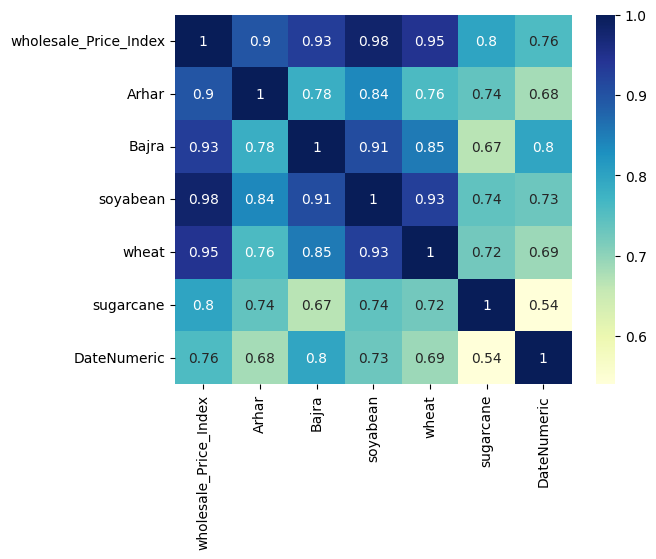

In [13]:
sns.heatmap(df.corr(),annot = True, cmap = 'YlGnBu')

In [14]:
X = df.iloc[:, 1:7]
y = df.iloc[:, 0:1]

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state= 48)

In [17]:
lin_reg = LinearRegression()

In [18]:
lin_reg.fit(X_train,y_train)

print("Train Score")
print(lin_reg.score(X_train,y_train))
print('Test Score')
print(lin_reg.score(X_test,y_test))

Train Score
0.9999987955042727
Test Score
0.9999983070276816


Prediction

In [19]:
prices = [112.1,131.3,146.7,135.90,125.2,202304]
predicted = lin_reg.predict([prices])
print(predicted)

[[129.68721044]]


In [20]:
import joblib

joblib.dump(lin_reg, "model.jbl.lzma")

['model.jbl.lzma']